# Regulatory Compliance Analysis

##Table of Contents
1. Problem Statement
2. Objective
3. Installing & Importing Libraries
4. Data Acquisition & Description
5. Data Cleaning
6. Exploratory Data Analysis
7. Conclusions


##1. Problem Statement
The problem at hand is to analyze consumer complaints related to various financial products and services and identify the categories of these products. This analysis is essential to empower consumers, level the playing field, and ensure compliance with federal consumer financial protection laws. The main objective is to categorize these complaints accurately, investigate and respond to them, and improve consumer financial experiences.

##2. Objective
Categorization of Consumer Complaints: The primary objective is to categorize consumer complaints into specific financial product categories. These categories include credit reporting, mortgage, debt collection, credit cards, and more.

Data Cleaning: The dataset contains null values, incorrect data types, and duplicates, which need to be addressed for accurate analysis. This objective involves data cleaning, including handling null values and removing duplicate records.

Label Standardization: Some labels, such as product names and state names, are too long or inconsistent. The objective is to standardize and simplify these labels for easier analysis and visualization.

Complaint Analysis: Analyze the dataset to identify patterns, trends, and insights related to consumer complaints. This includes understanding which products receive the most complaints, the response times of companies, and the states with the highest complaint volumes.

Consumer Disputes: Explore whether consumers disputed the complaints and whether they provided additional information about their disputes.

## 3. Installing & Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install -q pandas_profiling
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings(action = "ignore")
from zipfile import ZipFile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 37.8 MB/s eta 0:00:00


<ipython-input-1-1fe6769dda07>:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


<a id=Section4></a>
# **4. Data Acquisition & Description**

This data set is **based on consumer complaints** and is provided by Consumer Finance Protection Bureau and can be acquired from the <a href="https://www.consumerfinance.gov/data-research/consumer-complaints/">link</a>. The **Consumer Complaint Database** is a collection of complaints about consumer financial products and services that CFPB sent to companies for response.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 1511240 | 18 | 890 MB|

| Id | Features | Description |
| :--| :--| :--|
|1|**Date received**|Complaint received date.|
|2|**Product**|Category of product under which complaint was filed.|
|3|**Sub-product**|Category of sub product under which complaint was filed.|
|4|**Issue**|Issue with the product and sub-product under complaint filed.|
|5|**Sub-issue**|Sub-issue with respect to product and sub-product.|
|6|**Consumer complaint narrative**|A complete description of issue about the product|
|7|**Company public response**|A public response broadcasted on the issue.|
|8|**Company**|Name of the Company with which the product is associated.|
|9|**State**|State where the company resides.|
|10|**ZIP code**|Zip code of the area where company resides.|
|11|**Tags**|Tags associated with the product i.e. Servicemember, Older American.|
|12|**Consumer consent provided?**|Whether the consent is provided or not.|
|13|**Submitted via**|Complaint filed via Web, Referral, Phone, Postal mail, Fax, Email|
|14|**Date sent to company**|Date when this issue was forwared to the respective company.|
|15|**Company response to consumer**|Response provided by the company to the consumer.|
|16|**Timely response?**|Response time of the complaint filed by the consumer.|
|17|**Consumer disputed?**|If there was any dispute over the product filed complaint.|
|18|**Complaint ID**| Complaint ID|

In [2]:
# Download zip file
!wget 'https://files.consumerfinance.gov/ccdb/complaints.csv.zip'

# Unzipping
!unzip /content/complaints.csv.zip

--2023-08-22 11:11:08--  https://files.consumerfinance.gov/ccdb/complaints.csv.zip
Resolving files.consumerfinance.gov (files.consumerfinance.gov)... 13.32.151.63, 13.32.151.58, 13.32.151.46, ...
Connecting to files.consumerfinance.gov (files.consumerfinance.gov)|13.32.151.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 638189461 (609M) [binary/octet-stream]
Saving to: ‘complaints.csv.zip’

complaints.csv.zip  100%[===================>] 608.62M  37.2MB/s    in 19s     

2023-08-22 11:11:28 (32.2 MB/s) - ‘complaints.csv.zip’ saved [638189461/638189461]

Archive:  /content/complaints.csv.zip
  inflating: complaints.csv          


In [3]:
data = pd.read_csv('complaints.csv')
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2023-08-18,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",CA,90221,NaN,NaN,Web,2023-08-18,In progress,Yes,NaN,7419652
1,2023-08-18,Checking or savings account,Other banking product or service,Managing an account,Problem accessing account,NaN,NaN,"BANK OF AMERICA, NATIONAL ASSOCIATION",NY,12563,Older American,NaN,Web,2023-08-18,In progress,Yes,NaN,7415940
2,2023-08-17,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33613,NaN,NaN,Web,2023-08-17,In progress,Yes,NaN,7414860
3,2023-08-17,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",VA,23452,NaN,NaN,Web,2023-08-17,In progress,Yes,NaN,7414868
4,2023-08-17,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Investigation took more than 30 days,NaN,NaN,"EQUIFAX, INC.",GA,30281,NaN,NaN,Web,2023-08-17,In progress,Yes,NaN,7414110


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Complaint ID,3976976.0,4.252470e+06,1.994554e+06,1.0,2842553.5,4163775.0,6047501.5,7430319.0


###Data Information
In this section we will see the information about features i.e. types, count and null?.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976976 entries, 0 to 3976975
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 546.

###Observation:

- Some features that contain null values such as Sub-product, Sub-issue, Consumer complaint narrative, Company public response, State, Zip code, Tags, Consumer consent provided?, Company response to consumer, Consumer disputed?
- Some features are classified as incorrect type such as Date received, Date sent to company.


##5. Data Cleaning

In [6]:
data['Date received'] = pd.to_datetime(data['Date received'])
data['Date sent to company'] = pd.to_datetime(data['Date sent to company'])

In [7]:
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Type,datetime64[ns],object,object,object,object,object,object,object,object,object,object,object,object,datetime64[ns],object,object,object,int64


###Identification & Handling of Missing Data

In [8]:
print('Data Shape:', data.shape)
null_frame = pd.DataFrame()
null_frame['Features'] = data.columns.values
null_frame['Null Frequency'] = data.isnull().sum().values
null_frame['Missing %age'] = np.round(null_frame['Null Frequency']/data.shape[0], decimals = 4) * 100
null_frame.set_index('Features', inplace = True)
null_frame.transpose()

Data Shape: (3976976, 18)


Features,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Null Frequency,0.0,0.0,235291.00,0.0,719097.00,2536443.00,2144903.00,0.0,42873.00,30200.00,3557615.00,893593.00,0.0,0.0,5.0,0.0,3208618.00,0.0
Missing %age,0.0,0.0,5.92,0.0,18.08,63.78,53.93,0.0,1.08,0.76,89.46,22.47,0.0,0.0,0.0,0.0,80.68,0.0


In [9]:
# Chossing data containing only complaints
before_shape = data.shape
print('Data Shape [Before]:', before_shape)

data = data[pd.notnull(data['Consumer complaint narrative'])]

after_shape = data.shape
print('Data Shape [After]:', data.shape)
print('Total Dropped Records:', before_shape[0]-after_shape[0])
print('Dropped %age:', np.round(((before_shape[0] - after_shape[0])/ before_shape[0]), decimals = 3)*100)

Data Shape [Before]: (3976976, 18)
Data Shape [After]: (1440533, 18)
Total Dropped Records: 2536443
Dropped %age: 63.800000000000004


We will analyze again the missing percentage after dropping the NaN valued records from Consumer complaint narrative.

In [10]:
# Analyzing again the missing percentage left
null_frame = pd.DataFrame()
null_frame['Features'] = data.columns.values
null_frame['Null Frequency'] = data.isnull().sum().values
null_frame['Missing %age'] = np.round(null_frame['Null Frequency']/data.shape[0], decimals = 4) * 100
null_frame.set_index('Features', inplace = True)
null_frame.transpose()

Features,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
Null Frequency,0.0,0.0,52207.00,0.0,215065.00,0.0,699572.00,0.0,5448.00,0.0,1240459.00,0.0,0.0,0.0,2.0,0.0,1276499.00,0.0
Missing %age,0.0,0.0,3.62,0.0,14.93,0.0,48.56,0.0,0.38,0.0,86.11,0.0,0.0,0.0,0.0,0.0,88.61,0.0


Now we shall handle our missing data using central tendency measure i.e. Mean, Median or Mode.

In [11]:
# Replacing categorcial data with mode value
data['Sub-product'] = data['Sub-product'].replace(np.nan, data['Sub-product'].mode()[0])

data['Sub-issue'] = data['Sub-issue'].replace(np.nan, data['Sub-issue'].mode()[0])

data['ZIP code'] = data['ZIP code'].replace(np.nan, data['ZIP code'].mode()[0])

# Replacing missing data with label
data['Company public response'] = data['Company public response'].replace(np.nan, 'None')

data['Consumer disputed?'] = data['Consumer disputed?'].replace(np.nan, 'NA')

# Dropping data
data.dropna(subset = ['State'], inplace = True)

data.drop(labels = ['Tags', 'Complaint ID'], axis = 1, inplace = True)

Let's visualize again our missing data.

In [12]:
# Analyzing again the missing percentage left
print('Data Shape:', data.shape)
null_frame = pd.DataFrame()
null_frame['Features'] = data.columns.values
null_frame['Null Frequency'] = data.isnull().sum().values
null_frame['Missing %age'] = np.round(null_frame['Null Frequency']/data.shape[0], decimals = 4) * 100
null_frame.set_index('Features', inplace = True)
null_frame.transpose()

Data Shape: (1435085, 16)


Features,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
Null Frequency,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
Missing %age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### **Identification & Handling of Duplicate Rows**

Let's **identify** whether there **duplicate rows** present in the data or not.

In [13]:
print('Contains Duplicate Rows? (Original data)', data.duplicated().any())
before_shape = data.shape
print('Data Shape [Before]:', before_shape)
data = data.drop_duplicates()
print('Drop Success!')
after_shape = data.shape
print('Data Shape [After]:', after_shape)

print('Total Dropped Records:', before_shape[0]-after_shape[0])
print('Dropped %age:', np.round(((before_shape[0] - after_shape[0])/ before_shape[0]), decimals = 3)*100)

Contains Duplicate Rows? (Original data) True
Data Shape [Before]: (1435085, 16)
Drop Success!
Data Shape [After]: (1424333, 16)
Total Dropped Records: 10752
Dropped %age: 0.7000000000000001


In [14]:
data.columns[data.columns.duplicated()]

Index([], dtype='object')

**Observation:**

- We found **some** records **containing duplicate records** having count of 10752.
- We have **dropped** these records for further analysis.

##6. Exploratory Data Analysis

In [15]:
print('Data Shape:', data.shape)
data.head(2)

Data Shape: (1424333, 16)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
51,2023-07-10,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,I hope this email finds you well. I am writing...,Company believes the complaint is the result o...,"CCS Financial Services, Inc.",OH,441XX,Consent provided,Web,2023-08-08,Closed with explanation,Yes,NA
63,2023-08-02,Checking or savings account,Checking account,Closing an account,Funds not received from closed account,My name is XXXX XXXX XXXX. I opened a checking...,Company has responded to the consumer and the ...,U.S. BANCORP,GA,30102,Consent provided,Web,2023-08-02,Closed with non-monetary relief,Yes,NA


Our main piece of interest is to identify Product. But some of the **labels in Product is too long** which can pose a problem while analysing or visualizing data. So we will try to **reduce** the **label size** by changing its value.

In [16]:
product_frame = pd.DataFrame(data['Product'].value_counts())
product_frame.transpose()

,"Credit reporting, credit repair services, or other personal consumer reports",Debt collection,Mortgage,Credit card or prepaid card,Checking or savings account,Student loan,Credit reporting,"Money transfer, virtual currency, or money service",Vehicle loan or lease,Credit card,"Payday loan, title loan, or personal loan",Bank account or service,Consumer Loan,Payday loan,Money transfers,Prepaid card,Other financial service,Virtual currency
Product,739428,215407,107284,102320,73595,35426,31371,30011,25100,18773,16465,14765,9450,1744,1445,1445,289,15


**Observation:**

- We can see that some of the **labels of features are too long**, which can pose a problem while doing analyis.
- Next we will **re-label** values for our **features** such as Product and State to make our analyis simpler.

In [17]:
data.replace({'Product':{'Credit reporting, credit repair services, or other personal consumer reports':'Credit reporting, repair, or other'},
               'State':{'UNITED STATES MINOR OUTLYING ISLANDS':'US Minor Islands'}}, inplace = True)

####Question 1: What is the proportion of Consumer Complaints with respect to the product?

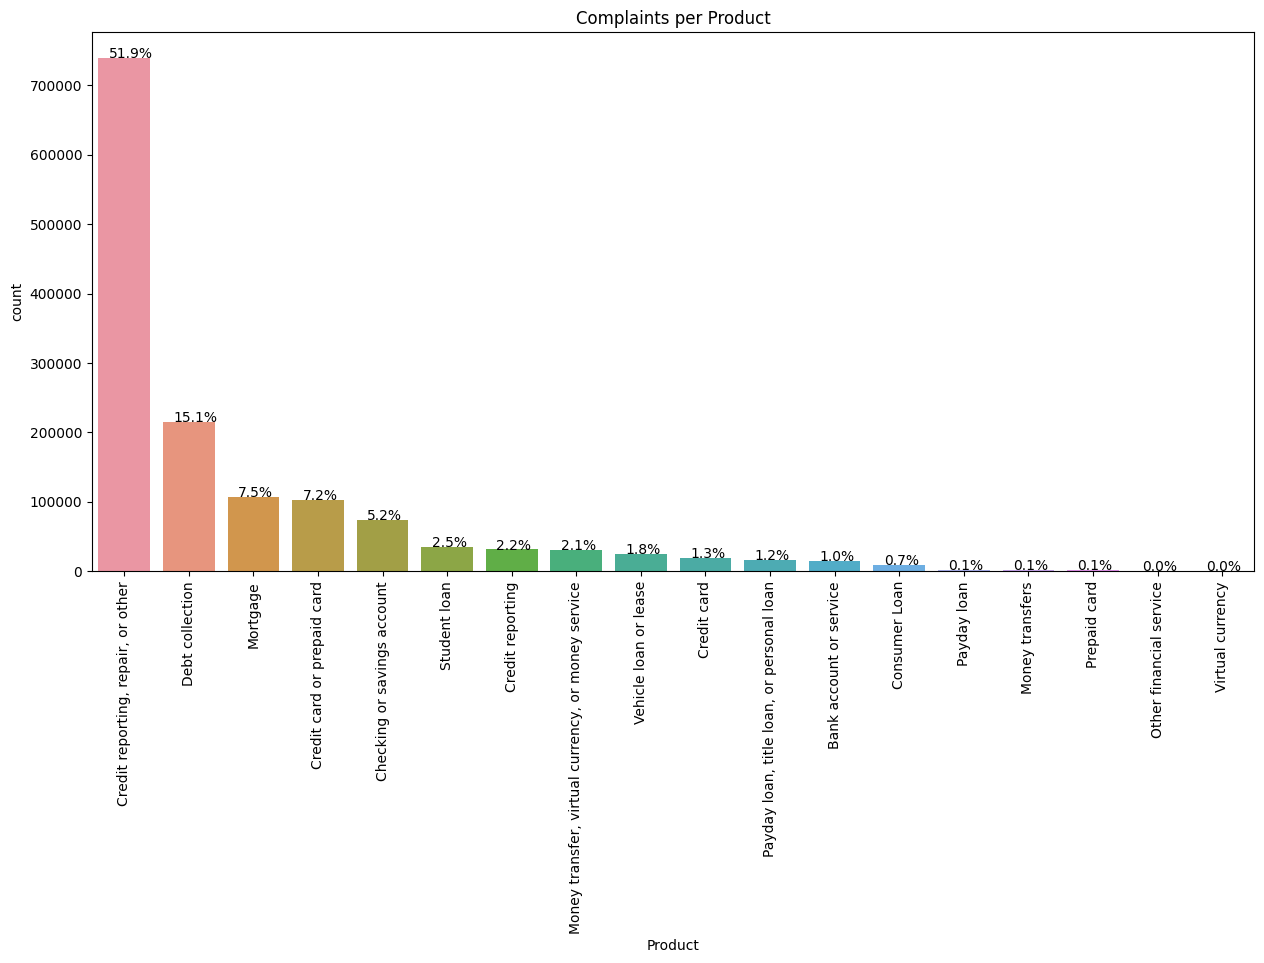

In [18]:
figure = plt.figure(figsize=[15,7])
a = data['Product'].value_counts()
b = a.index.tolist()
ax = sns.countplot(data=data,x='Product',order=b)
for p in ax.patches:
    total = data.shape[0]
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/5
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y))
plt.title('Complaints per Product')
plt.xticks(rotation=90)
plt.show()

**Observation:**

- **Credit reporting, repair or others** are having **more compalints** than any other product i.e. **~52%**.
- Consumer complaints for **virtual currency** has **very few complaints** than any other product.

####Question 2: In which year the number of complaints were more?

In [19]:
high_comp_year = pd.DataFrame(data = data['Date received'].value_counts().head(20))
high_comp_year.columns = ['Frequency']
high_comp_year.transpose()

,2023-01-20,2017-09-08,2023-01-19,2023-06-13,2023-05-09,2023-05-24,2023-05-10,2023-01-23,2023-03-14,2022-05-03,2023-06-06,2023-05-08,2023-06-09,2023-02-01,2023-06-20,2023-03-28,2023-02-10,2023-02-28,2022-12-07,2023-05-23
Frequency,2169,1878,1867,1829,1818,1814,1803,1800,1760,1699,1693,1676,1663,1661,1657,1652,1650,1637,1637,1635


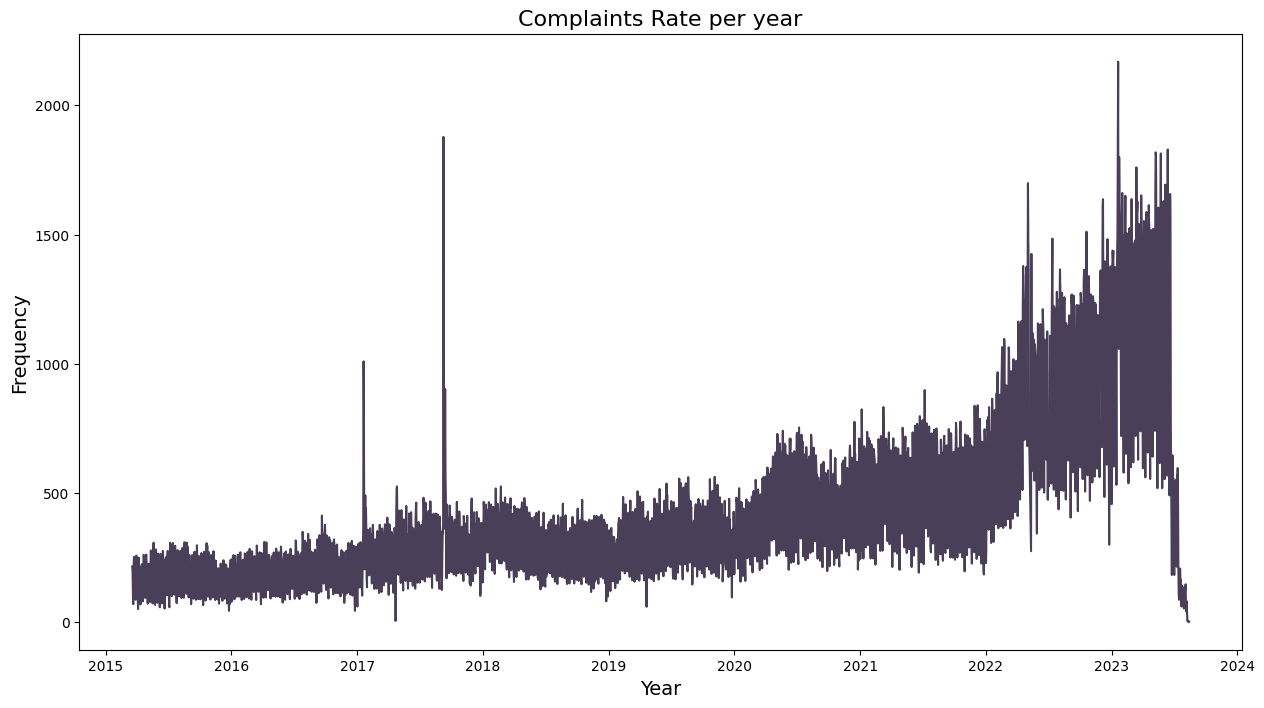

In [20]:
figure = plt.figure(figsize = [15, 8])
sns.lineplot(x=data['Date received'].value_counts().index, y=data['Date received'].value_counts().values,color='#493F58')
plt.xlabel('Year', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Complaints Rate per year', size = 16)
plt.show()

**Observation:**
- We can see that **number of complaints were more in (2022-2023)**, to be more precise around the month of **January in 2023**.

####Question 3: What is the frequency of company public response on receiving complaints?

In [21]:
company_public_frame = pd.DataFrame(data['Company public response'].value_counts())
company_public_frame.columns = ['Frequency']
company_public_frame

,Frequency
None,690626
Company has responded to the consumer and the CFPB and chooses not to provide a public response,627699
Company believes it acted appropriately as authorized by contract or law,61204
Company chooses not to provide a public response,19674
Company believes the complaint is the result of a misunderstanding,6183
Company disputes the facts presented in the complaint,5367
Company believes complaint caused principally by actions of third party outside the control or direction of the company,3820
Company believes complaint is the result of an isolated error,3277
Company believes complaint represents an opportunity for improvement to better serve consumers,2613
Company can't verify or dispute the facts in the complaint,1914


**Observation:**

- For **majority** of complaints there was **no response**, neither to consumer nor to CFPB and public response.
- For second **majority** of **complaints** **company** has **responded** to the **consumer** as well as **CFPB** but **abstain** to provide a **public response**.
- For **minority** of **complaints** **company** **believes** that **complaint relates to a discontinued policy or procedure**.

####Question 4: Which are the top 10 companies that had highest number of complaints from customers?

In [22]:
top10 = pd.DataFrame(data['Company'].value_counts().head(10))
top10.columns = ['Frequency']
top10.transpose()

,"EQUIFAX, INC.","TRANSUNION INTERMEDIATE HOLDINGS, INC.",Experian Information Solutions Inc.,WELLS FARGO & COMPANY,CAPITAL ONE FINANCIAL CORPORATION,"BANK OF AMERICA, NATIONAL ASSOCIATION",JPMORGAN CHASE & CO.,"CITIBANK, N.A.",SYNCHRONY FINANCIAL,"Navient Solutions, LLC."
Frequency,234126,216765,203136,36607,34879,34763,34363,32490,19280,18060


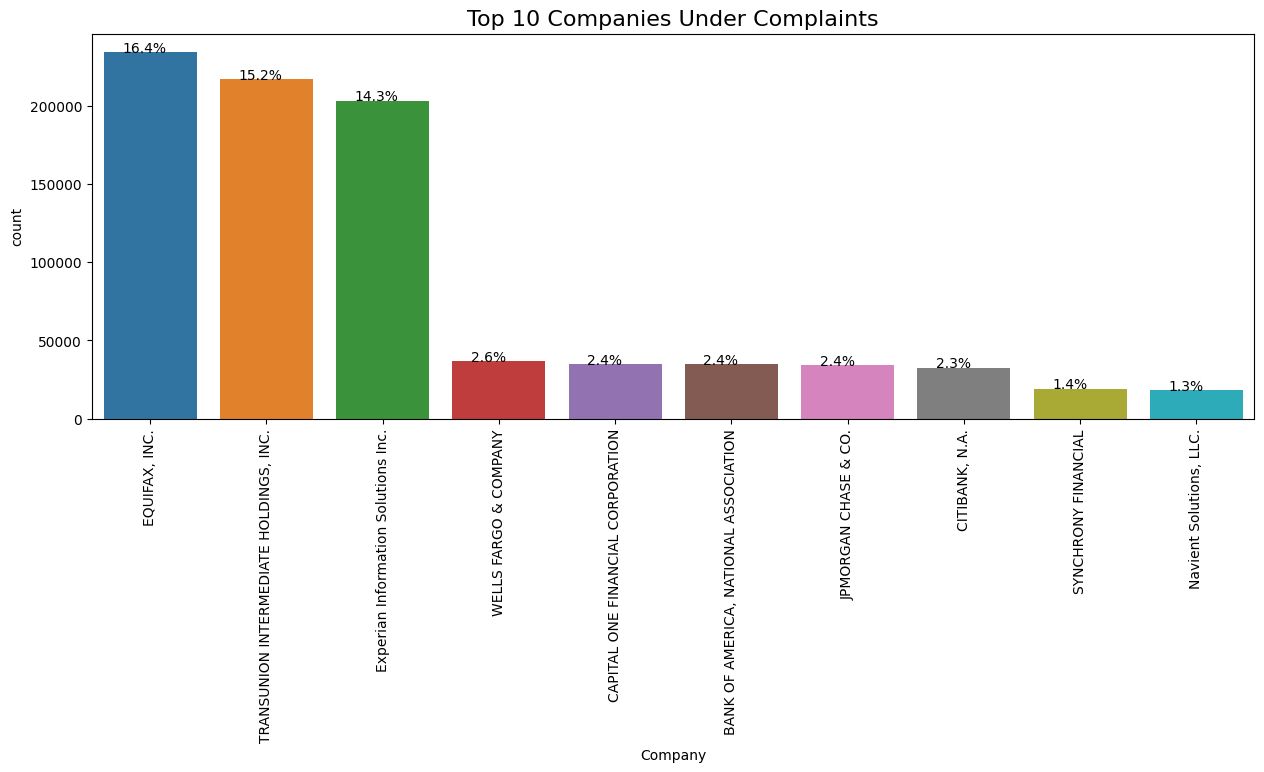

In [23]:
figure = plt.figure(figsize=[15,5])
a = data['Company'].value_counts().head(10)
b = a.index.tolist()
ax = sns.countplot(data=data,x='Company',order=b)
for p in ax.patches:
    total = data.shape[0]
    percentage = '{:.1f}%'.format(100*p.get_height()/total)
    x = p.get_x() + p.get_width()/5
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y))
plt.xticks(rotation=90)
plt.title('Top 10 Companies Under Complaints', size = 16)
plt.show()

####Question 5: What is the complaint rate per State?

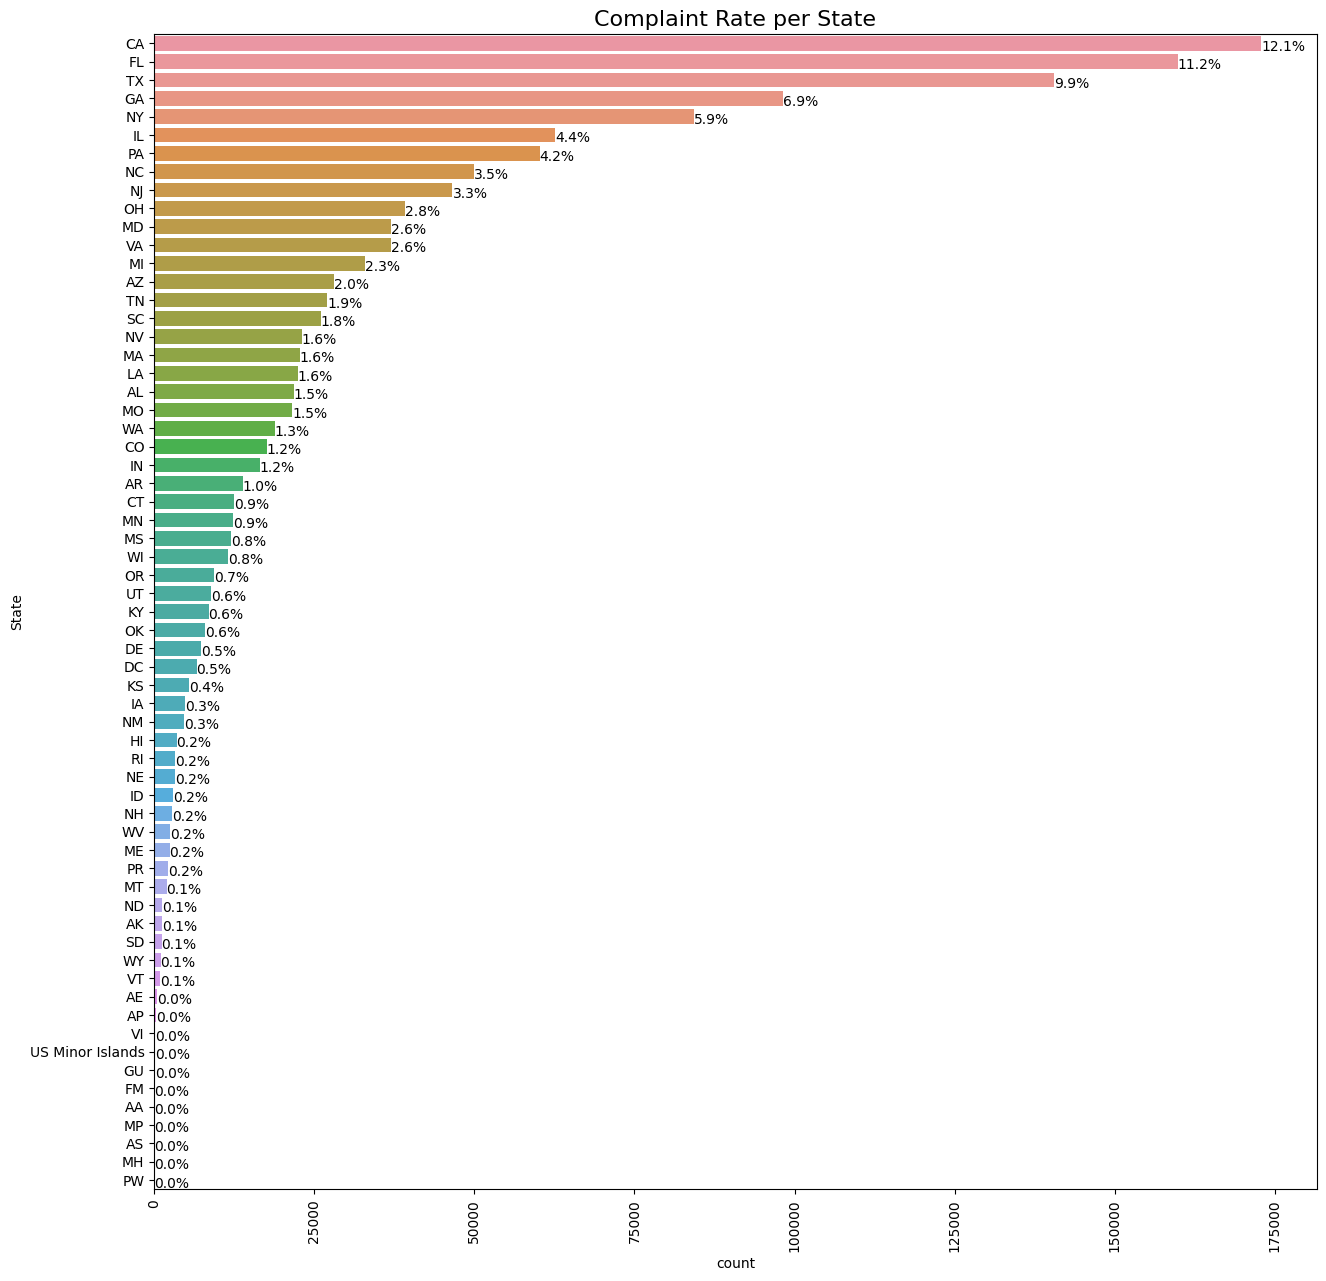

In [24]:
figure = plt.figure(figsize=[15,15])
a = data['State'].value_counts()
b = a.index.tolist()
ax = sns.countplot(data=data,y='State',order=b)
for p in ax.patches:
    total = data.shape[0]
    percentage = '{:.1f}%'.format(100*p.get_width()/total)
    x = p.get_x() + p.get_width()
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y))
plt.xticks(rotation=90)
plt.title('Complaint Rate per State', size = 16)
plt.show()

**Observation:**

- CA or **California** is found to be register **more number of complaints** than any other state i.e. **~12%**.
- Then followed by FL or **Florida by 11%**.
- Then by TX or **Texas by ~10%** and **so on...**

####Question 6: In what way, the customers prefered the submitting their complaint?

In [25]:
print(data['Submitted via'].value_counts())

Web    1424333
Name: Submitted via, dtype: int64


####Question 7: What is frequency of the timely response with respsect to each product?

In [26]:
timely_response_frame = pd.DataFrame(data['Timely response?'].value_counts())
timely_response_frame.columns = ['Frequency']
timely_response_frame.transpose()

,Yes,No
Frequency,1401543,22790


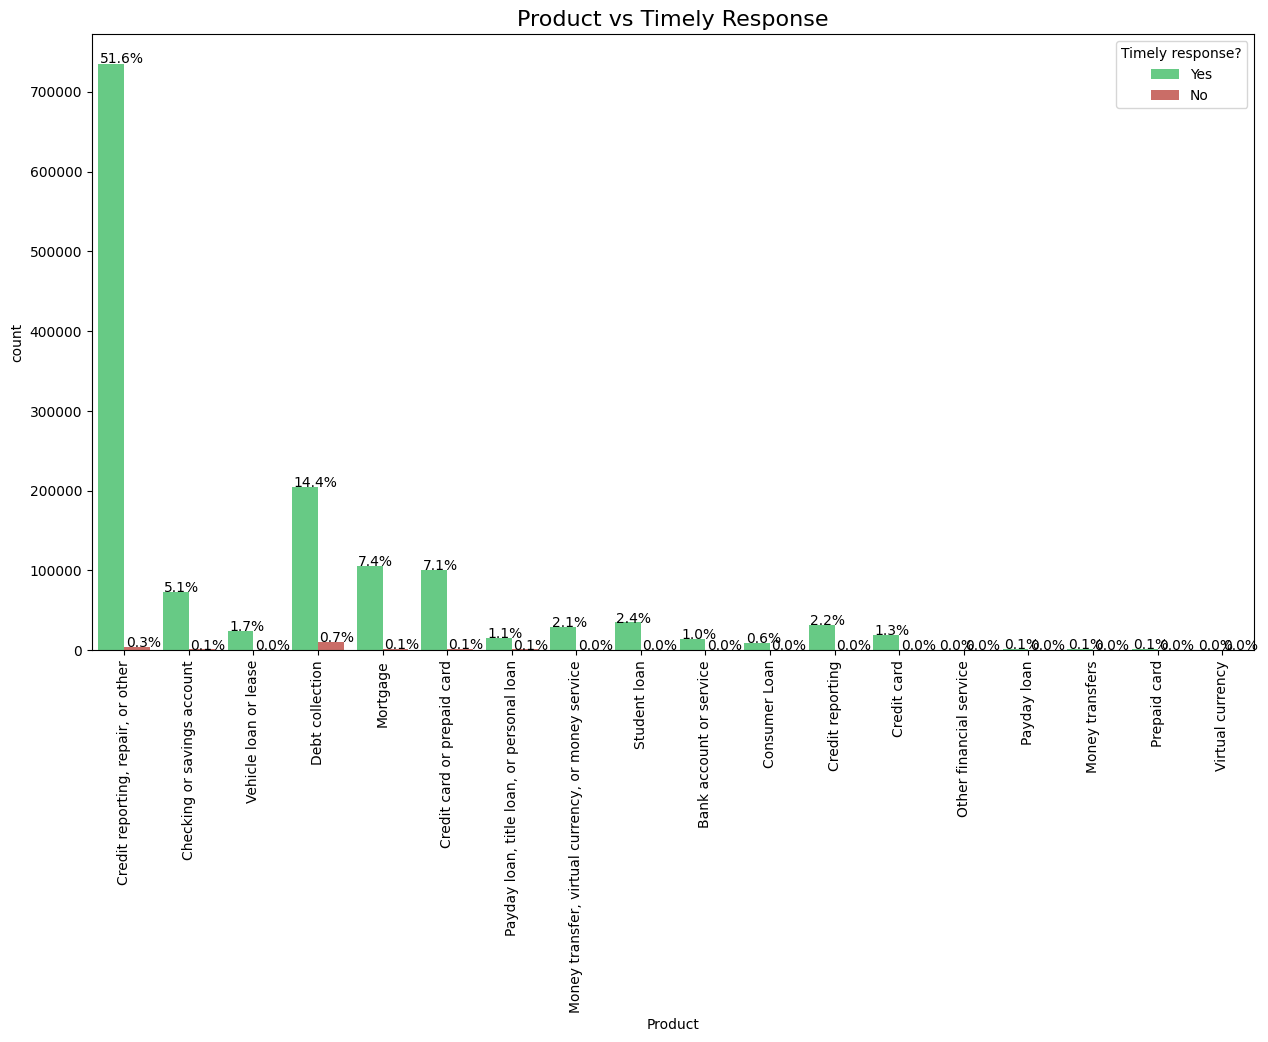

In [27]:
figure = plt.figure(figsize = [15, 8])
ax = sns.countplot(x = 'Product',  data = data, hue = 'Timely response?', palette = ['#56DB7F', '#DB5E56'])

total = data.shape[0]
for p in ax.patches:
  percentage = '{:.1f}%'.format(100*p.get_height() / total)
  x = p.get_x() + p.get_width() / 18
  y = p.get_y() + p.get_height() * 1.001
  ax.annotate(percentage, (x, y))
plt.xticks(rotation = 90)
plt.title('Product vs Timely Response', size = 16)
plt.show()

**Observation:**

- **Credit reporting, repair and others** product complaints were **responded timely with 51% rate** with respect to others. Only **0.3% of complaints were late in response**.
- **Debt collection** had around **0.7% of complaints** that were **not responded on time**.

####Question 8: What is the dispute frequency per product by customer?

In [28]:
dispute_frame = pd.DataFrame(data['Consumer disputed?'].value_counts())
dispute_frame.columns = ['Frequency']
dispute_frame.transpose()

,NA,No,Yes
Frequency,1261025,127701,35607


In [29]:
dispute_frame = pd.DataFrame(data.groupby(by = ['Product', 'Consumer disputed?']).size(), columns = ['Frequency'])
dispute_frame.transpose()

Product            Bank account or service       Checking or savings account  \
Consumer disputed?                      No   Yes                          NA   
Frequency                            11668  3097                       73595   

Product            Consumer Loan       Credit card        \
Consumer disputed?            No   Yes          No   Yes   
Frequency                   7262  2188       14529  4244   

Product            Credit card or prepaid card Credit reporting        ...  \
Consumer disputed?                          NA               No   Yes  ...   
Frequency                               102320            24856  6515  ...   

Product            Payday loan Payday loan, title loan, or personal loan  \
Consumer disputed?         Yes                                        NA   
Frequency                  243                                     16465   

Product            Prepaid card      Student loan              \
Consumer disputed?           No  Yes           NA    No   Yes   
Frequency                  1238  207        24330  8969  2127   

Product            Vehicle loan or lease Virtual currency      
Consumer disputed?                    NA               No Yes  
Frequency                          25100                8   7  

[1 rows x 33 columns]

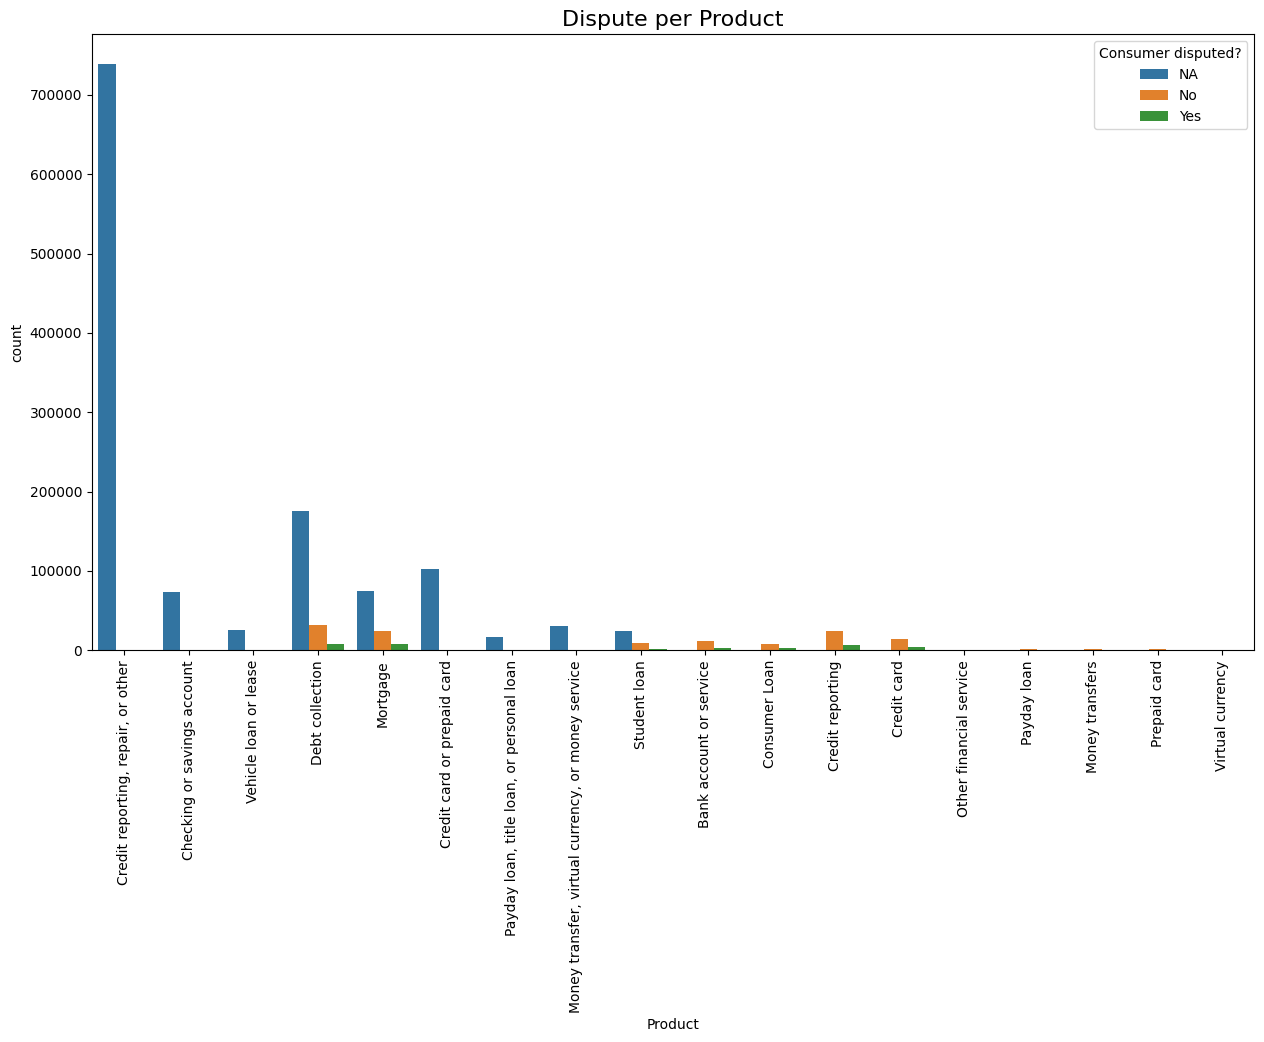

In [30]:
figure = plt.figure(figsize = [15, 8])
ax = sns.countplot(x = 'Product',  data = data, hue = 'Consumer disputed?')
plt.xticks(rotation = 90)
plt.title('Dispute per Product', size = 16)
plt.show()

**Observation:**

- From above we can see that **some customer disputed, some not and some didn't provide any information**.
- For product **Credit reporting, repair or other**, **customers didn't provide any information** about their dispute regarding product.
- Rest is explainable from the graph.

##7. Conclusions
- Product Categories: The analysis revealed that "Credit reporting, credit repair services, or other personal consumer reports" received the highest number of complaints (~52%), while "Virtual currency" had relatively few complaints compared to other products.

- Complaint Trends: There was a noticeable spike in complaints in January 2023, indicating potential issues during that time.

- Company Responses: A significant portion of complaints did not receive a response from companies, both to consumers and to the Consumer Finance Protection Bureau (CFPB). The second most common response type was a response to the consumer but no public response.

- State-wise Distribution: California (CA) had the highest number of complaints (~12%), followed by Florida (FL) with 11%, and Texas (TX) with approximately 10%.

- Response Timeliness: Complaints related to "Credit reporting, repair, or other" had the highest response rate (51%) compared to other products, with only 0.3% of responses being late. "Debt collection" had around 0.7% of complaints with late responses.

- Consumer Disputes: It was observed that some consumers disputed their complaints, some did not, and some did not provide any dispute information. For the "Credit reporting, repair, or other" product, consumers did not provide information about their disputes. The dispute status varied across different product categories.

- These conclusions provide valuable insights for the Consumer Finance Protection Bureau to take appropriate actions, address consumer concerns, and improve the overall consumer financial experience.